In [50]:
import numpy as np
import pandas as pd

In [51]:
df = pd.read_csv('placement.csv')
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [53]:
df = df.iloc[:, 1:]
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [54]:
import matplotlib.pyplot as plt


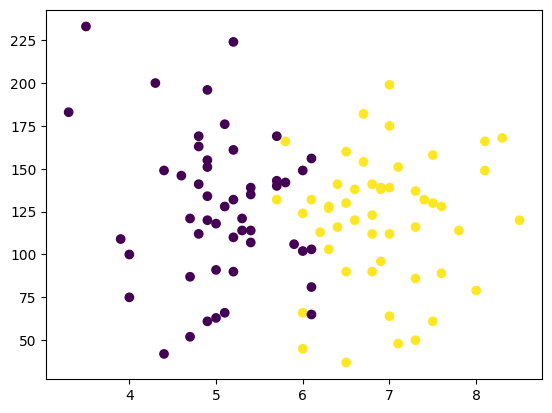

In [55]:
df = pd.read_csv('placement.csv')
if 'cgpa' in df.columns:
    plt.scatter(df['cgpa'], df['iq'], c=df['placement'])
else:
    print("The 'cgpa' column does not exist in the dataframe.")


In [56]:
X = df.iloc[:,0:2]
X

,Unnamed: 0,cgpa
0,0,6.8
1,1,5.9
2,2,5.3
3,3,7.4
4,4,5.8
...,...,...
95,95,4.3
96,96,4.4
97,97,6.7
98,98,6.3


In [57]:
Y = df.iloc[:,-1]
Y.shape

(100,)

In [58]:
from sklearn.model_selection import train_test_split


In [59]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.1)

In [60]:
X_train

,Unnamed: 0,cgpa
13,13,6.4
71,71,6.1
99,99,6.2
53,53,8.3
60,60,6.9
...,...,...
79,79,6.5
73,73,4.9
38,38,6.5
24,24,4.7


In [61]:
Y_train

13    1
71    1
99    1
53    1
60    1
     ..
79    1
73    0
38    1
24    0
22    0
Name: placement, Length: 90, dtype: int64

In [62]:
X_test

,Unnamed: 0,cgpa
51,51,4.8
94,94,4.7
40,40,4.9
56,56,6.1
48,48,6.6
65,65,8.1
85,85,5.8
58,58,8.0
15,15,5.1
67,67,5.0


In [63]:
Y_test

51    0
94    0
40    0
56    0
48    1
65    1
85    1
58    1
15    0
67    0
Name: placement, dtype: int64

In [64]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [65]:
X_train = scaler.fit_transform(X_train)

In [66]:
X_train

array([[-1.20767442,  0.35460151],
       [ 0.76172904,  0.08865038],
       [ 1.71247554,  0.17730075],
       [ 0.15053486,  2.03895866],
       [ 0.38822149,  0.79785339],
       [-1.41140581, -0.88650377],
       [-1.64909244,  0.70920301],
       [-1.58118197, -0.62055264],
       [-0.15506223,  1.32975565],
       [-1.54722674,  1.24110527],
       [ 1.10128136, -0.53190226],
       [-0.39274885,  1.86165791],
       [-0.52856978,  0.        ],
       [-0.42670408, -0.26595113],
       [-0.73230117,  0.        ],
       [ 0.04866917, -2.21625942],
       [-0.93603256,  0.97515414],
       [ 1.57665461, -1.5070564 ],
       [ 1.40687845,  1.1524549 ],
       [ 0.21844533,  1.59570678],
       [ 0.35426625, -1.06380452],
       [-1.34349535, -0.79785339],
       [-0.7662564 ,  0.88650377],
       [ 1.37292322, -0.97515414],
       [-0.63043548,  1.41840603],
       [-0.12110699,  0.        ],
       [ 0.89754997, -1.06380452],
       [-1.51327151, -0.17730075],
       [-1.37745058,

In [67]:
X_test = scaler.transform(X_test)
X_test

array([[ 0.0826244 , -1.06380452],
       [ 1.54269938, -1.1524549 ],
       [-0.29088315, -0.97515414],
       [ 0.25240056,  0.08865038],
       [-0.0192413 ,  0.53190226],
       [ 0.55799765,  1.86165791],
       [ 1.23710229, -0.17730075],
       [ 0.32031102,  1.77300753],
       [-1.13976396, -0.79785339],
       [ 0.62590811, -0.88650377]])

In [68]:
from sklearn.linear_model import LogisticRegression


In [69]:
clf = LogisticRegression()

In [70]:
clf.fit(X_train, Y_train)

LogisticRegression()

In [71]:
y_pred = clf.predict(X_test)

In [72]:
Y_test

51    0
94    0
40    0
56    0
48    1
65    1
85    1
58    1
15    0
67    0
Name: placement, dtype: int64

In [73]:
from sklearn.metrics import accuracy_score

In [74]:
accuracy_score(Y_test, y_pred)

0.9

<Axes: >

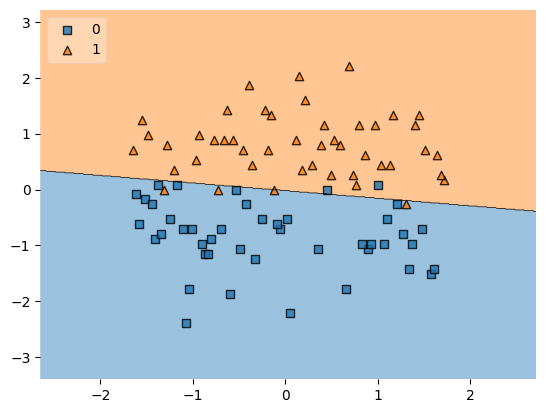

In [76]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_train, Y_train.values, clf=clf, legend=2)